In [37]:
import pandas as pd
from sklearn import datasets, linear_model
import statsmodels.formula.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import seaborn as sns
from seaborn.linearmodels import corrplot,symmatplot
import numpy as np
import os
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [3]:
os.chdir('/Users/jinseokryu/Desktop/승욱님_강의자료/대구대학교/')

In [4]:
marketing = pd.read_csv("./marketing.csv")

In [5]:
marketing.head()

,google_adwords,facebook,twitter,marketing_total,revenues,employees,pop_density
0,65.66,47.86,52.46,165.98,39.26,5,High
1,39.10,55.20,77.40,171.70,38.90,7,Medium
2,174.81,52.01,68.01,294.83,49.51,11,Medium
3,34.36,61.96,86.86,183.18,40.56,7,High
4,78.21,40.91,30.41,149.53,40.21,9,Low


In [6]:
marketing.describe()

,google_adwords,facebook,twitter,marketing_total,revenues,employees
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,169.868488,33.869651,38.982442,242.720581,44.610930,7.866279
std,87.472279,15.270010,21.962255,95.859483,5.835498,2.364361
min,23.650000,8.000000,5.890000,53.650000,30.450000,3.000000
25%,97.247500,19.367500,20.937500,158.415000,40.327500,6.000000
50%,169.475000,33.655000,34.595000,245.565000,43.995000,8.000000
75%,243.105000,47.805000,52.937500,322.615000,48.612500,10.000000
max,321.000000,62.170000,122.190000,481.000000,58.380000,12.000000


In [7]:
train = marketing[:int(len(marketing)*0.7)]
test = marketing[int(len(marketing)*0.7):]

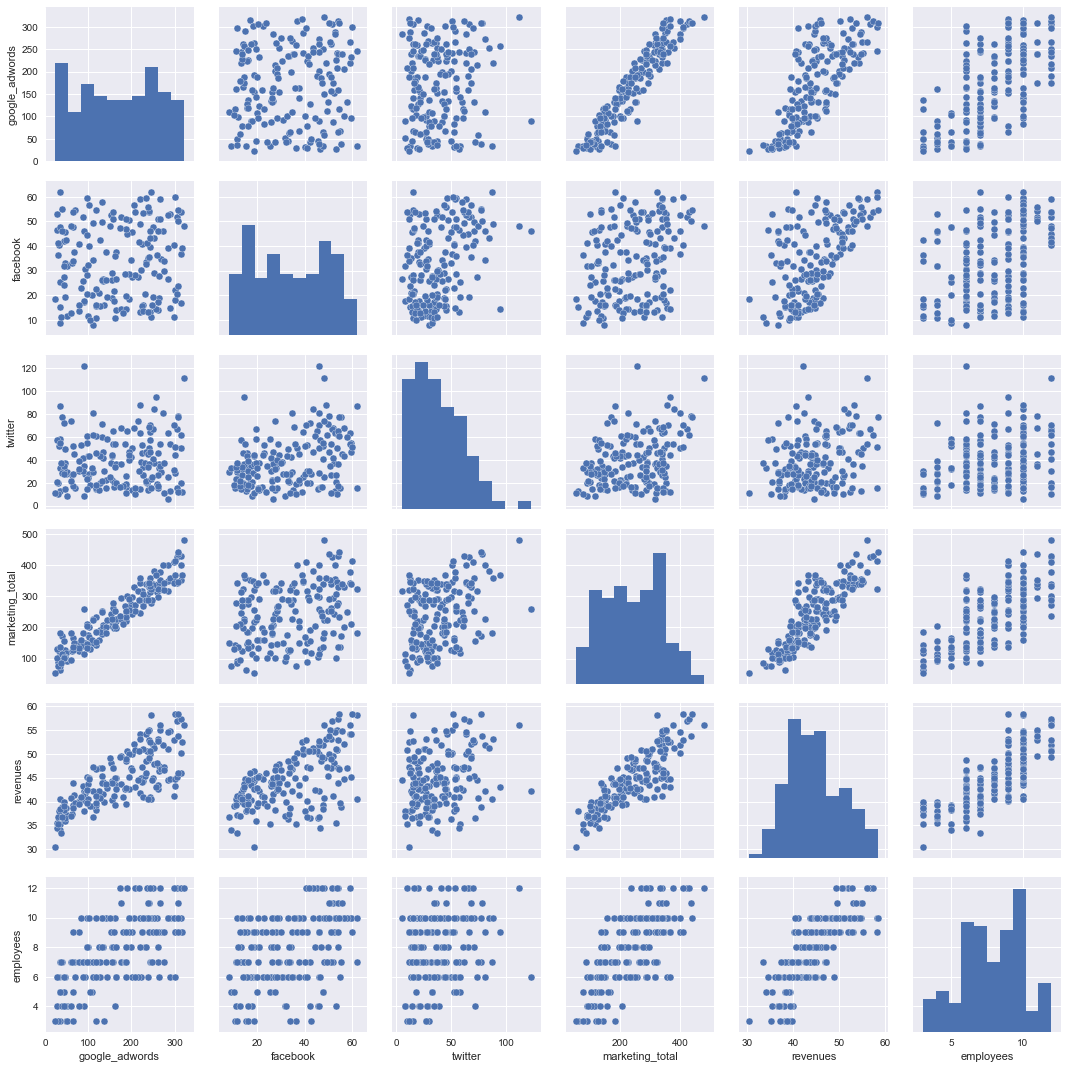

In [8]:
sns.pairplot(marketing)

In [9]:
marketing.corr()

,google_adwords,facebook,twitter,marketing_total,revenues,employees
google_adwords,1.000000,0.076432,0.098975,0.947357,0.766246,0.661031
facebook,0.076432,1.000000,0.354341,0.310223,0.577821,0.410197
twitter,0.098975,0.354341,1.000000,0.375869,0.269685,0.229062
marketing_total,0.947357,0.310223,0.375869,1.000000,0.853035,0.721017
revenues,0.766246,0.577821,0.269685,0.853035,1.000000,0.765686
employees,0.661031,0.410197,0.229062,0.721017,0.765686,1.000000


/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/linearmodels.py:1290: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/seaborn/linearmodels.py:1356: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


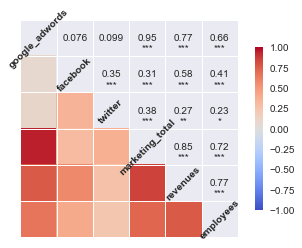

In [10]:
corrplot(marketing)

In [11]:
model = sm.ols(formula = 'revenues ~ marketing_total', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     454.2
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           6.88e-50
Time:                        13:44:53   Log-Likelihood:                -435.09
No. Observations:                 172   AIC:                             874.2
Df Residuals:                     170   BIC:                             880.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          32.0067      0.636     

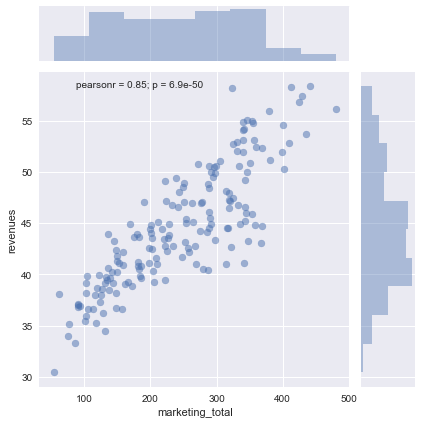

In [12]:
x, y = marketing["marketing_total"],marketing["revenues"]

# or via jointplot (with histograms aside):
sns.jointplot(x, y, kind='scatter', joint_kws={'alpha':0.5})

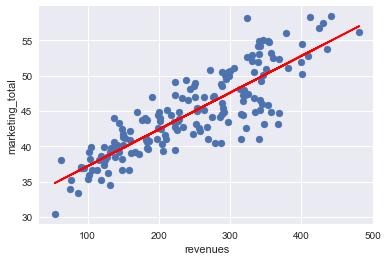

In [13]:
plt.scatter(x,y)
plt.plot(x,result.predict(marketing[["marketing_total"]]),'r')
plt.ylabel('marketing_total')
plt.xlabel('revenues')

In [14]:
model = sm.ols(formula = 'revenues ~ google_adwords', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.587
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     241.8
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           1.75e-34
Time:                        13:44:54   Log-Likelihood:                -470.88
No. Observations:                 172   AIC:                             945.8
Df Residuals:                     170   BIC:                             952.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         35.9276      0.628     57.

In [15]:
model = sm.ols(formula = 'revenues ~ facebook', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     85.21
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           1.05e-16
Time:                        13:44:54   Log-Likelihood:                -512.02
No. Observations:                 172   AIC:                             1028.
Df Residuals:                     170   BIC:                             1034.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     37.1319      0.888     41.800      0.0

In [16]:
model = sm.ols(formula = 'revenues ~ twitter', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.067
Method:                 Least Squares   F-statistic:                     13.33
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           0.000347
Time:                        13:44:54   Log-Likelihood:                -540.46
No. Observations:                 172   AIC:                             1085.
Df Residuals:                     170   BIC:                             1091.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.8176      0.877     47.660      0.0

In [17]:
model1 = sm.ols(formula = 'revenues ~ google_adwords + facebook', data = marketing)
result1 = model1.fit()
# 요약결과 출력
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     512.0
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           1.90e-72
Time:                        13:44:54   Log-Likelihood:                -378.88
No. Observations:                 172   AIC:                             763.8
Df Residuals:                     169   BIC:                             773.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.6195      0.509     58.

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = marketing[["google_adwords","facebook"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,3.142389,google_adwords
1,3.142389,facebook


In [19]:
model = sm.ols(formula = 'revenues ~ google_adwords + facebook + twitter', data = marketing)
result = model.fit()
# 요약결과 출력
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:               revenues   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     339.8
Date:                Mon, 25 Jun 2018   Prob (F-statistic):           4.36e-71
Time:                        13:44:54   Log-Likelihood:                -378.77
No. Observations:                 172   AIC:                             765.5
Df Residuals:                     168   BIC:                             778.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         29.5460      0.534     55.

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfX0 = marketing[["google_adwords","facebook","twitter"]]
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX0.values, i) for i in range(dfX0.shape[1])]
vif["features"] = dfX0.columns
vif

,VIF Factor,features
0,3.436268,google_adwords
1,5.009430,facebook
2,4.384159,twitter


In [21]:
y_fit = result1.predict(test[['google_adwords','facebook']])

/Users/jinseokryu/anaconda/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


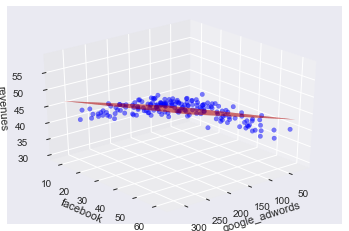

In [88]:
x_surf, y_surf = np.meshgrid(np.linspace(marketing.google_adwords.min(), marketing.google_adwords.max(), 100),np.linspace(marketing.facebook.min(), marketing.facebook.max(), 100))
onlyX = pd.DataFrame({'google_adwords': x_surf.ravel(), 'facebook': y_surf.ravel()})
fittedY=result1.predict(exog=onlyX)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x_surf,y_surf,fittedY.reshape(x_surf.shape), color='r', alpha=0.7)
ax.scatter(marketing['google_adwords'],marketing['facebook'],marketing['revenues'],c='blue', marker='o', alpha=0.5)
ax.set_xlabel('google_adwords')
ax.set_ylabel('facebook')
ax.set_zlabel('revenues')
ax.view_init(azim=50)

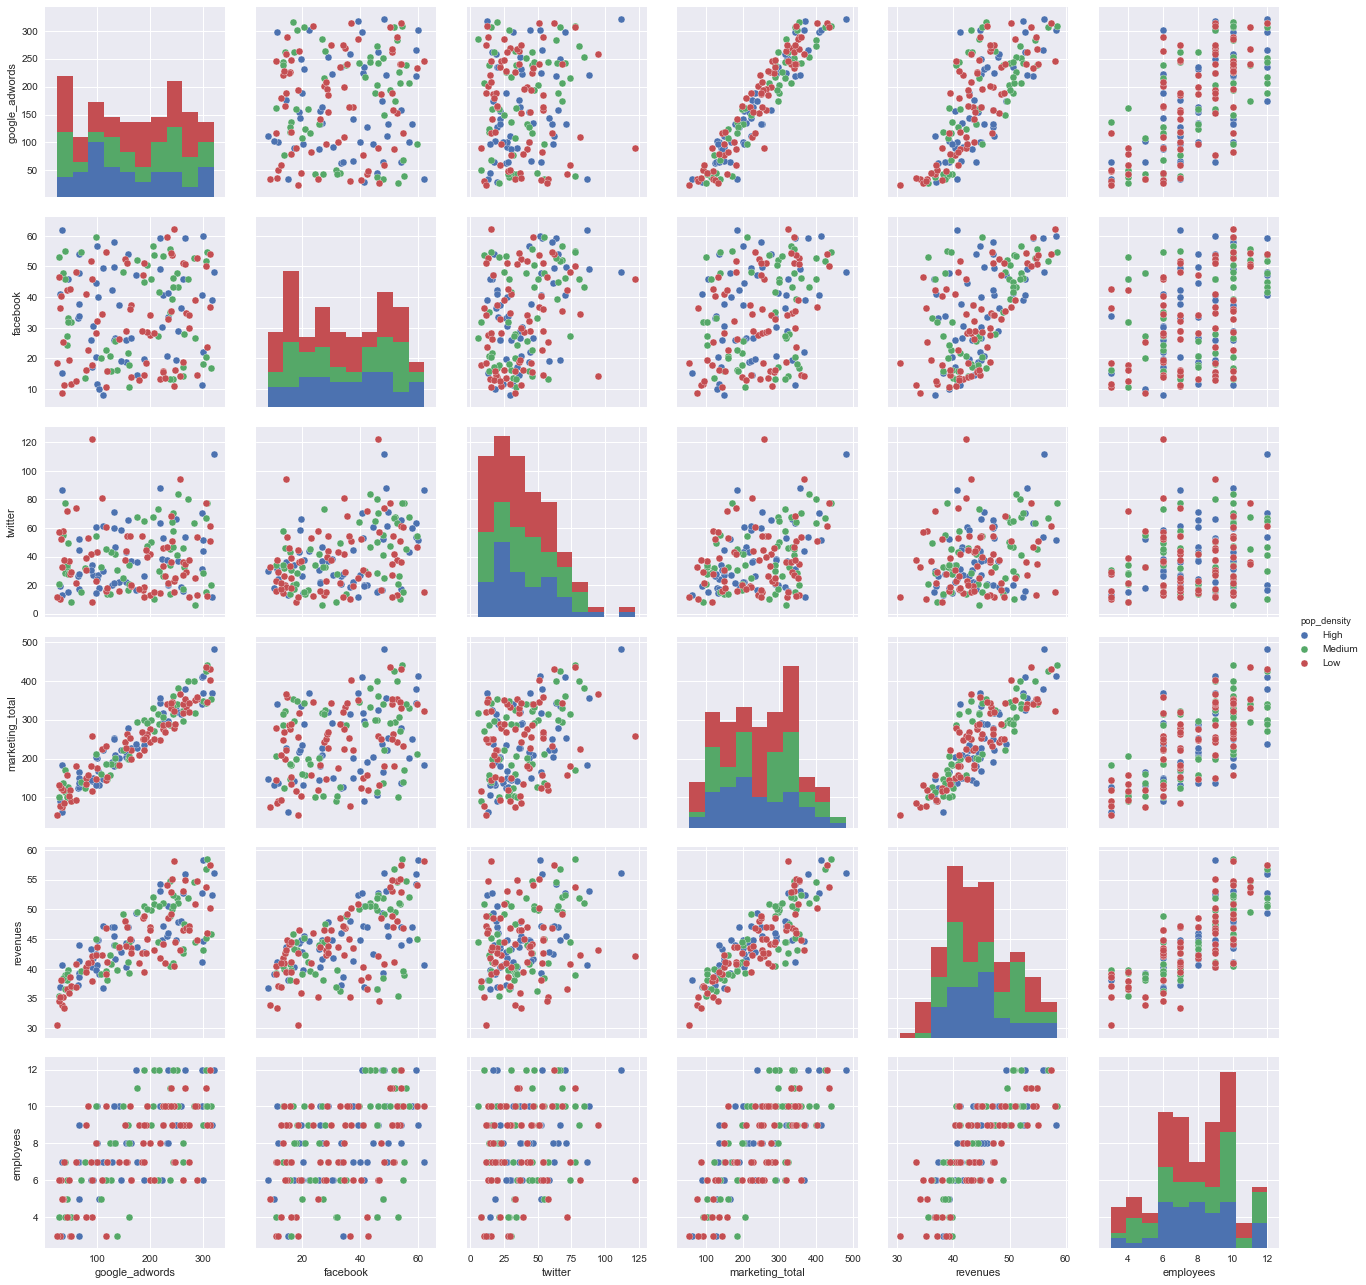

In [89]:
sns.pairplot(marketing, hue='pop_density',size=3)

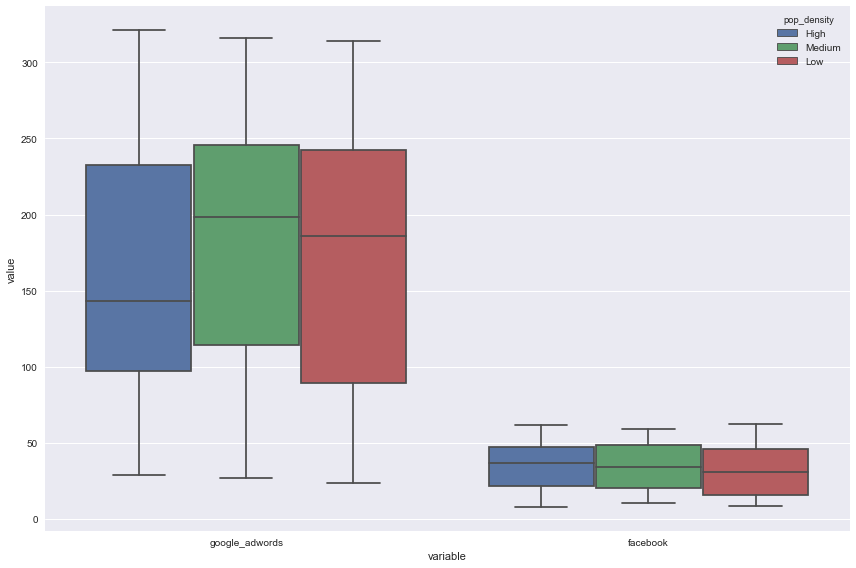

In [90]:
sns.factorplot(kind='box', y='value', x='variable', hue='pop_density',
               data=pd.melt(marketing, id_vars=['pop_density'], value_vars=['google_adwords', 'facebook']), size=8, aspect=1.5, legend_out=False) 